# Example Automatic IF Derivation

Plotting graph...


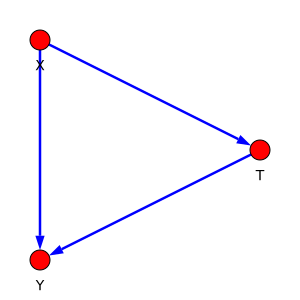

In [1]:
import causaleffect
from IPython.display import display, Math


G = causaleffect.createGraph(['T->Y', 'X->Y', 'X->T'])

print('Plotting graph...')
causaleffect.plotGraph(G)

In [2]:
print('Deriving identification formula using causal effect package...')
P = causaleffect.ID({'Y'}, {'T'}, G)
string = P.printLatex()
print('\n String for identification formula:  ', string)

split_by = 'P'
s =  [split_by+e for e in string.split(split_by) if e]

s_updated = []

for term in s:
    if 'sum' in term and (term[0].split('\\')[0] == 'P'):
        mod = s[0].split('\\')
        s_updated.append('\\' + mod[1])
    else:
        s_updated.append(term)

print('\n List of terms for parsing:  ', s_updated)

print('\n Plotting latex...')
display(Math(string))
print(string)

Deriving identification formula using causal effect package...

 String for identification formula:   \sum_{x}P(x)P(y|t, x)

 List of terms for parsing:   ['\\sum_{x}', 'P(x)', 'P(y|t, x)']

 Plotting latex...


<IPython.core.display.Math object>

\sum_{x}P(x)P(y|t, x)


## Derive the Influence Function

In [3]:
def nominator_parse(nominator_terms):

    # Parse the nominator:
    nominator_list = [None]*(len(nominator_terms)-1)
    i = 0
    nominator_uncond_count = 0
    for term in nominator_terms[1:]:
        a_b = term.split("|")
        if len(a_b) == 1: # this means that set b is empty. Refer to the part where we defined \delta(b)/P(b)=1 for this case.
            temp_sub1 = a_b[0][1:-1].split(',')
            delta_sub = '{\\tilde{' + '},\\tilde{'.join(temp_sub1) + '}' +'}'
            nominator_list[i] = '\\frac{\\delta_' + delta_sub + a_b[0] + '}{P' + a_b[0] + '}'
            nominator_uncond_count += 1
        else:
            [a,b] = [a_b[0], a_b[1]]
            ab = a + ',' + b
            temp_sub1_ab = ab[1:-1].split(',')
            delta_sub_ab = '{\\tilde{' + '},\\tilde{'.join(temp_sub1_ab) + '}'+ '}'
            temp_sub1_b = b[:-1].split(',')
            delta_sub_b = '{\\tilde{' + '},\\tilde{'.join(temp_sub1_b) + '}'+'}'
            nominator_list[i] = '\\frac{\\delta_' + delta_sub_ab + ab + '}{P' + ab + '}-\\frac{\\delta_' + delta_sub_b + '(' + b + '}{P(' + b + '}'
        i += 1
    return nominator_list, nominator_uncond_count


def denominator_parse(denominator_terms):
    
    # Parse the denominator:
    denominator_list = [None]*len(denominator_terms)
    i = 0
    denominator_uncond_count = 0
    for term in denominator_terms:
        c_d = term.split("|")
        if len(c_d) == 1: # this means that set d is empty. Refer to the part where we defined \delta(d)/P(d)=1 for this case.

            denominator_uncond_count += 1
            temp_sub1 = c_d[0][1:-1].split(',')
            delta_sub = '{\\tilde{' + '},\\tilde{'.join(temp_sub1) + '}' +'}'
            denominator_list[i] = '\\frac{\\delta_' + delta_sub + c_d[0] + '}{P' + c_d[0] + '}'

        else:
            [c,d] = [c_d[0], c_d[1]]
            cd = c + ',' + d
            temp_sub1_cd = cd[1:-1].split(',')
            delta_sub_cd = '{\\tilde{' + '},\\tilde{'.join(temp_sub1_cd) + '}'+ '}'
            temp_sub1_d = d[:-1].split(',')
            delta_sub_d = '{\\tilde{' + '},\\tilde{'.join(temp_sub1_d) + '}'+'}'
            denominator_list[i] = '\\frac{\\delta_' + delta_sub_cd + cd + '}{P' + cd + '}-\\frac{\\delta_' + delta_sub_d + '(' + d + '}{P(' + d + '}'


        i += 1
    return denominator_list, denominator_uncond_count


def IF_derivation(est):

    temp = est.split('/')

    if len(temp) < 2:
      nominator = temp[0]
      IF_denom = ''
      denom_counts = 0
    else:
      [nominator, denominator] = temp
      denominator_terms = denominator.split("P")[1:]
      denom_list, denom_counts = denominator_parse(denominator_terms)
      IF_denom = ' - (' + "+".join(denom_list) + ')'
    
    
    nominator_terms = nominator.split("P")
    nom_list, nom_counts = nominator_parse(nominator_terms)
    IF_nom = '(' + "+".join(nom_list) + ')'
    
    # insert '+' if positive int
    last_term = denom_counts - nom_counts
    if last_term > 0:
      last_term = '+' + str(last_term)
    elif last_term == 0:
      last_term = ''
    last_term = str(last_term)
    
    return est + '[' + IF_nom  + IF_denom +  last_term + ']'

est = string
IF = IF_derivation(est)
print('\n Plotting latex...')
display(Math(IF))


 Plotting latex...


<IPython.core.display.Math object>